# Settings

In [1]:
import sys
is_colab = False
if "google.colab" in sys.modules:
  is_colab = True

In [2]:
if is_colab:
    from google.colab import drive
    drive.mount('/content/drive')

In [3]:
HOME_DIR = './' #画像の置いたフォルダ
if is_colab:
    HOME_DIR = '/content/drive/MyDrive/kaggle/WG/' #画像の置いたフォルダ

#Yoloの学習画像はimagesフォルダ、アノテ値はlabelsフォルダに有る場合が多い
IMAGE_DIR = HOME_DIR + '/images/'
ANNOT_DIR = HOME_DIR + '/labels/'
#CG画像の縮小後のサイズ
render_h, render_w = 360, 640
#動画の解像度、フレームレート
dest_h, dest_w,dest_fps = 640, 640,5.0
cam_id = 0
cam_offset = [0]*10
mura_files = IMAGE_DIR + '*.png'
SKIP_FRAMES = int(30.0/dest_fps + 0.25)

# Blender Render

In [4]:
!nvidia-smi

Tue Dec  6 15:19:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 517.00       Driver Version: 517.00       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   53C    P8    17W /  N/A |    454MiB /  6144MiB |     24%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
#%%capture
!pip install opencv-python==4.5.5.62
!pip install tqdm
!pip install matplotlib

In [6]:
# !blender --version

In [7]:
# !echo  BLENDER_EEVEE CYCLES
# FRAME_MABIKI=6
# !echo $FRAME_MABIKI
# #!blender.exe --background -noaudio loblaw_jissun_movieD.blend -E BLENDER_EEVEE --frame-jump $FRAME_MABIKI --python render_script.py --log-level 0 --log-show-timestamp --log-file render.log >>render_err.txt 2>&1
# !blender.exe --background -noaudio loblaw_jissun_movie_eval.blend -E BLENDER_EEVEE --log-show-timestamp --log-file render.log  --python render_script_longMovie.py>render_err.txt 2>&1

## 連番の動画生成・json作成

In [8]:
# !pip install matplotlib

In [9]:
import os
print(os.getcwd())

D:\50_GembaCPS\Camera.005


In [10]:
import os
import numpy as np
import cv2

from tqdm.notebook import tqdm

In [11]:
import matplotlib.pyplot as plt

./rendering_parking_long//images\image00294.png
./rendering_parking_long//images\image00594.png
./rendering_parking_long//images\image00894.png
./rendering_parking_long//images\image01194.png
./rendering_parking_long//images\image01494.png
./rendering_parking_long//images\image01794.png
./rendering_parking_long//images\image02094.png
./rendering_parking_long//images\image02394.png
done writing 417 images to ./rendering_parking_long//camera001_long.mp4!
---------------------



ffmpeg version 5.1.2-full_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-liblensfun --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --e

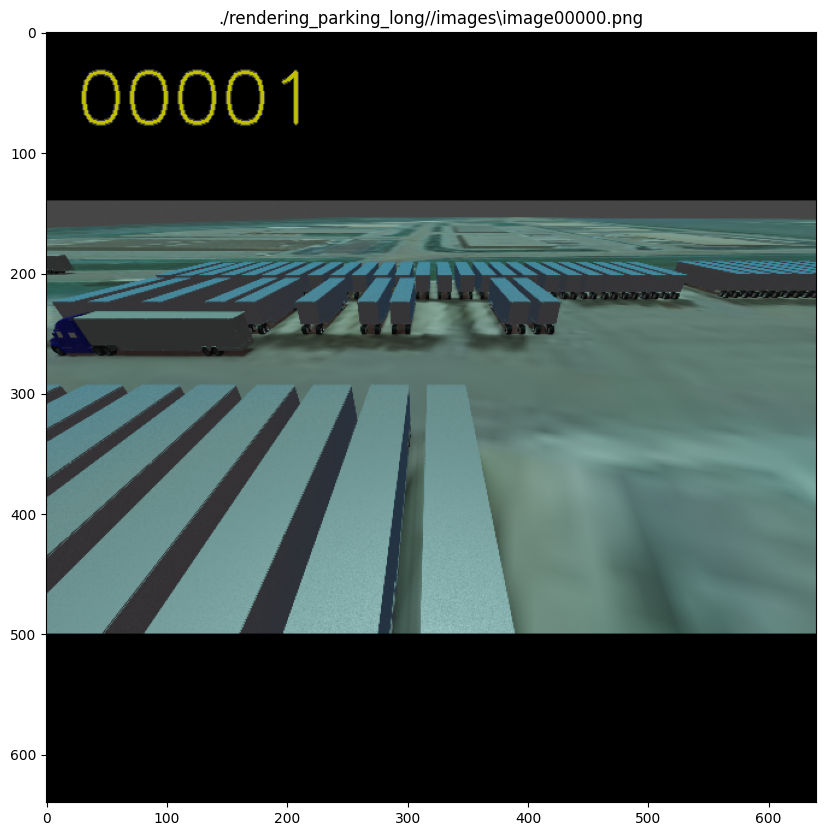

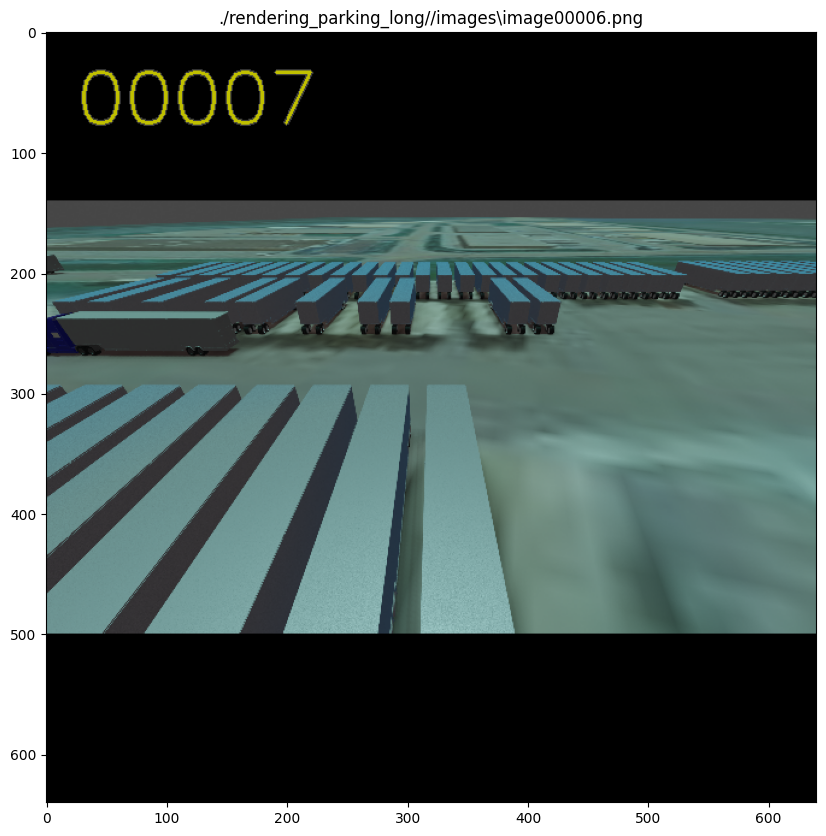

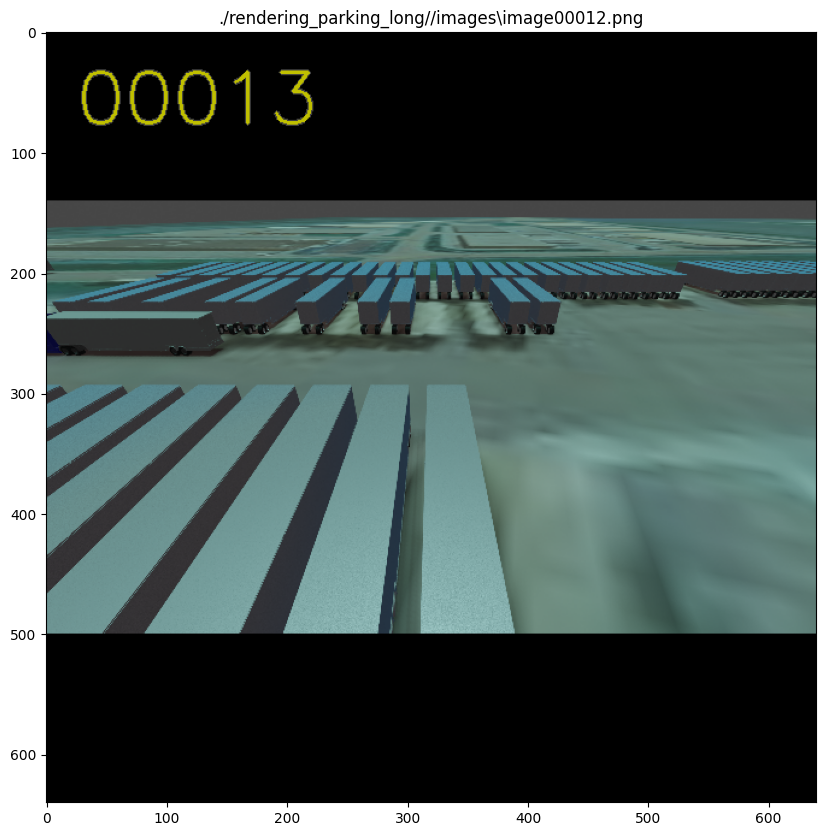

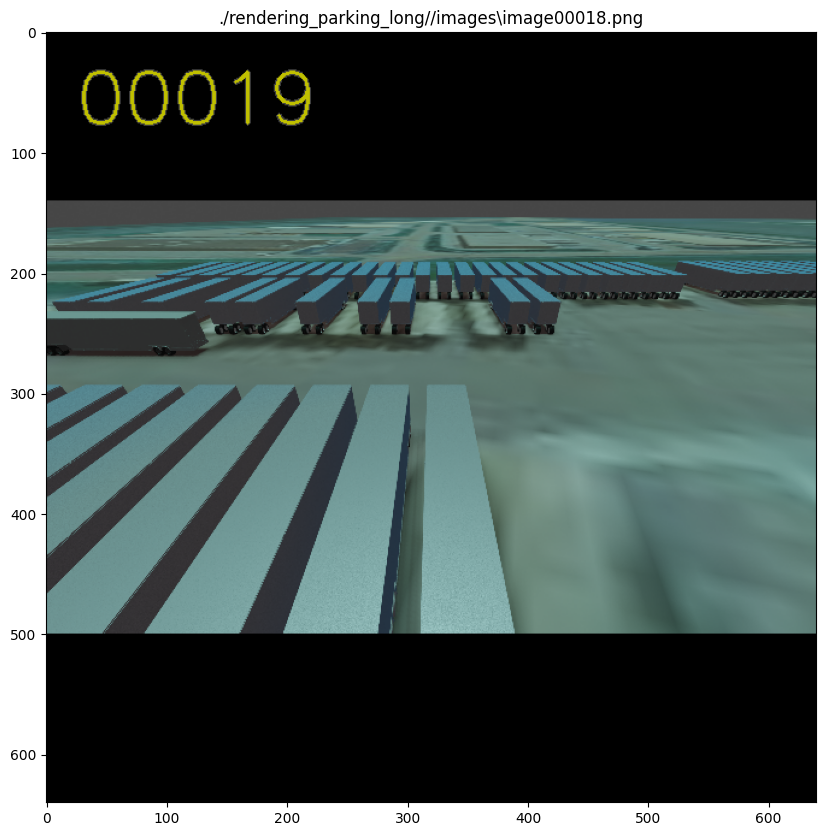

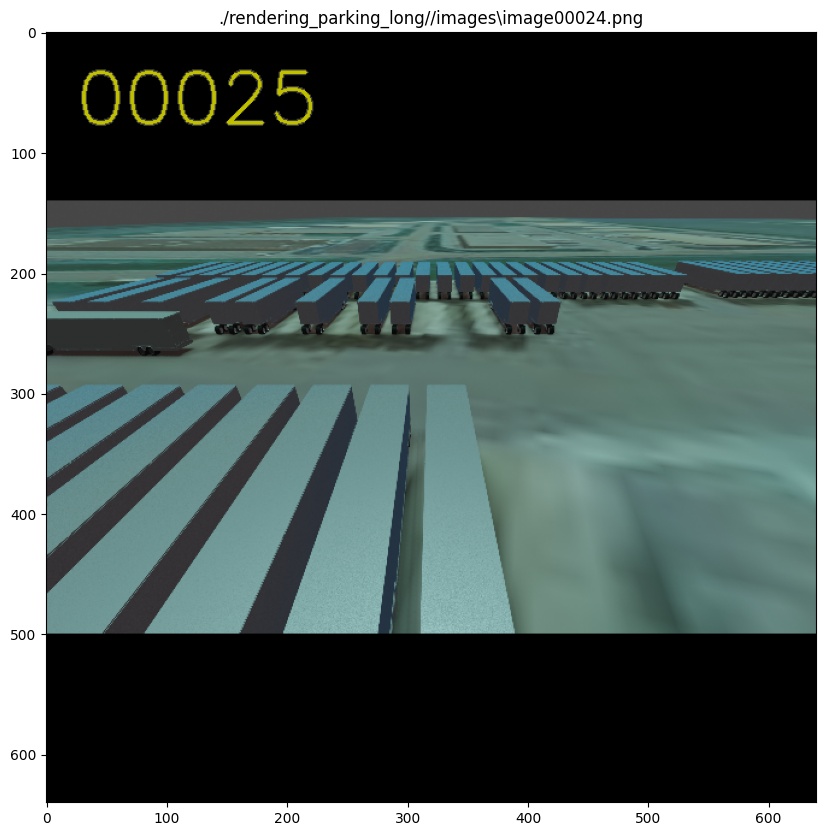

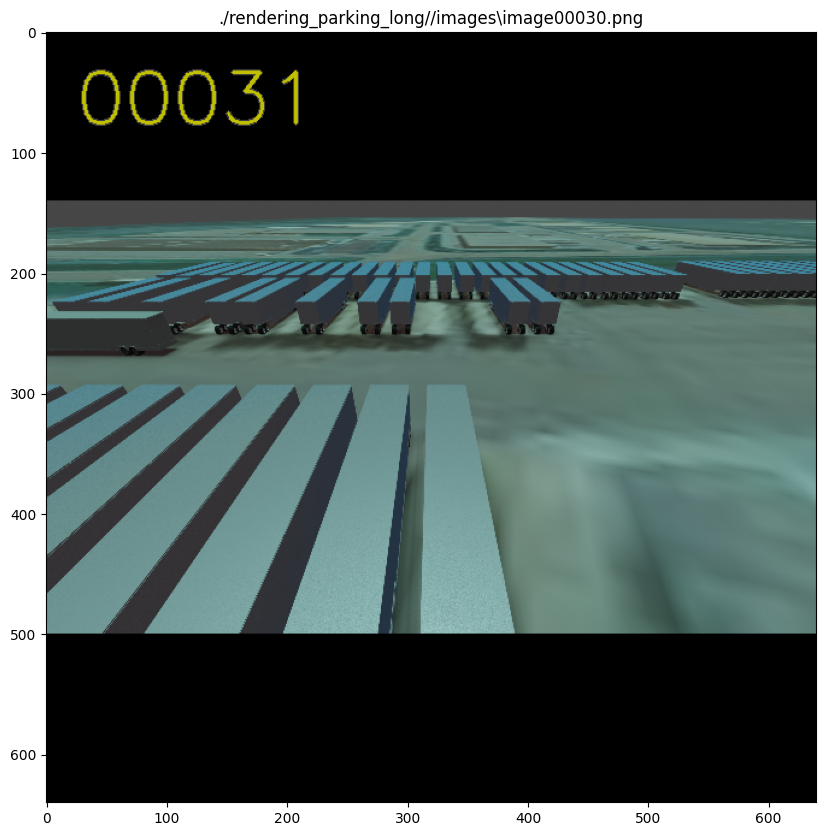

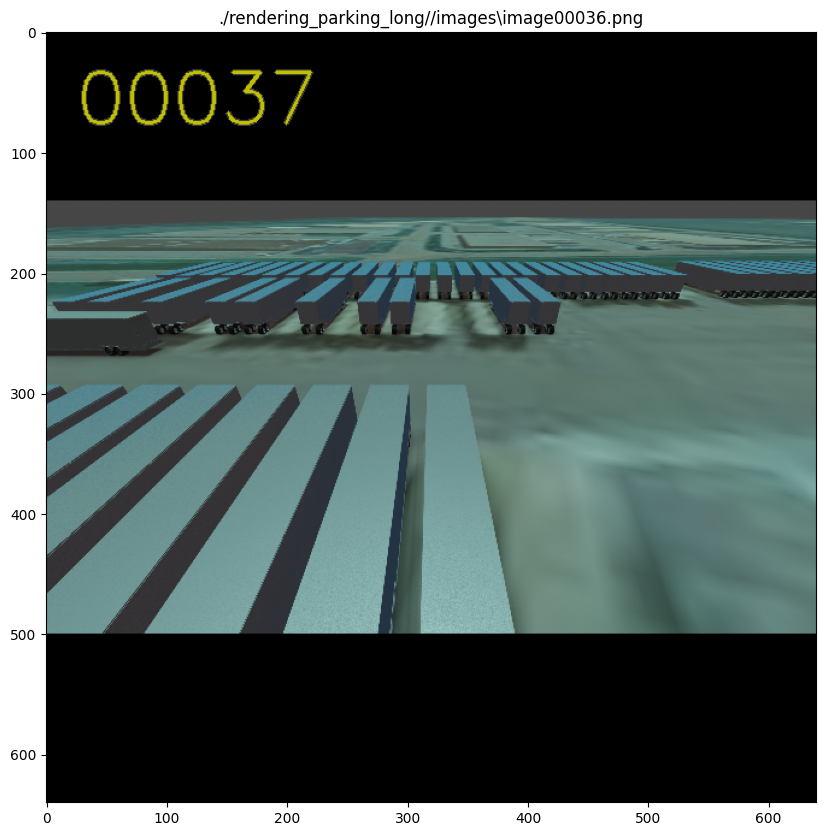

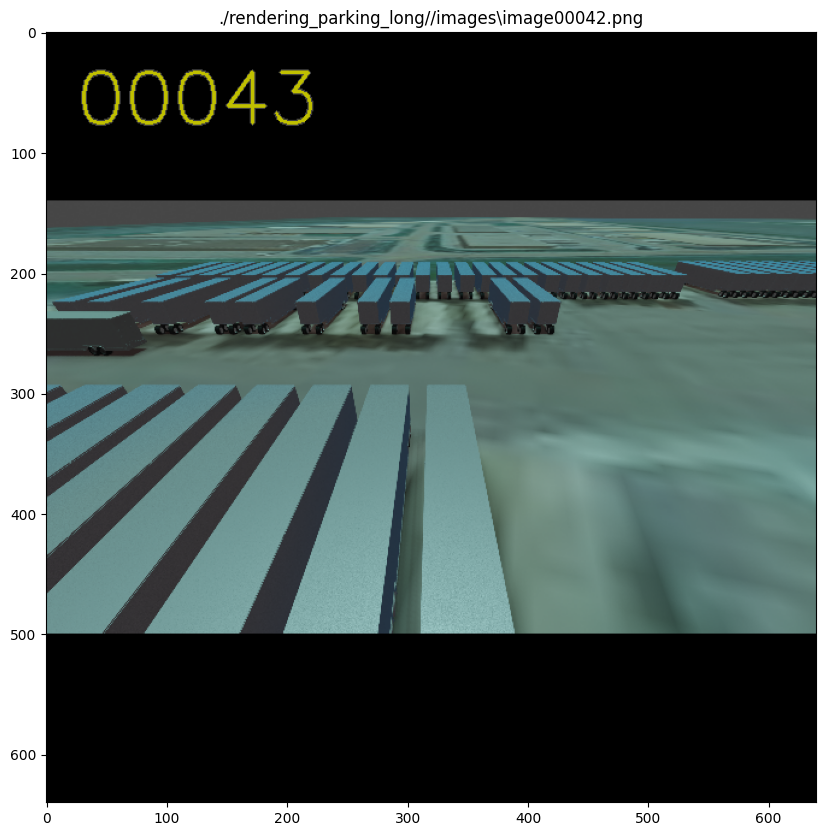

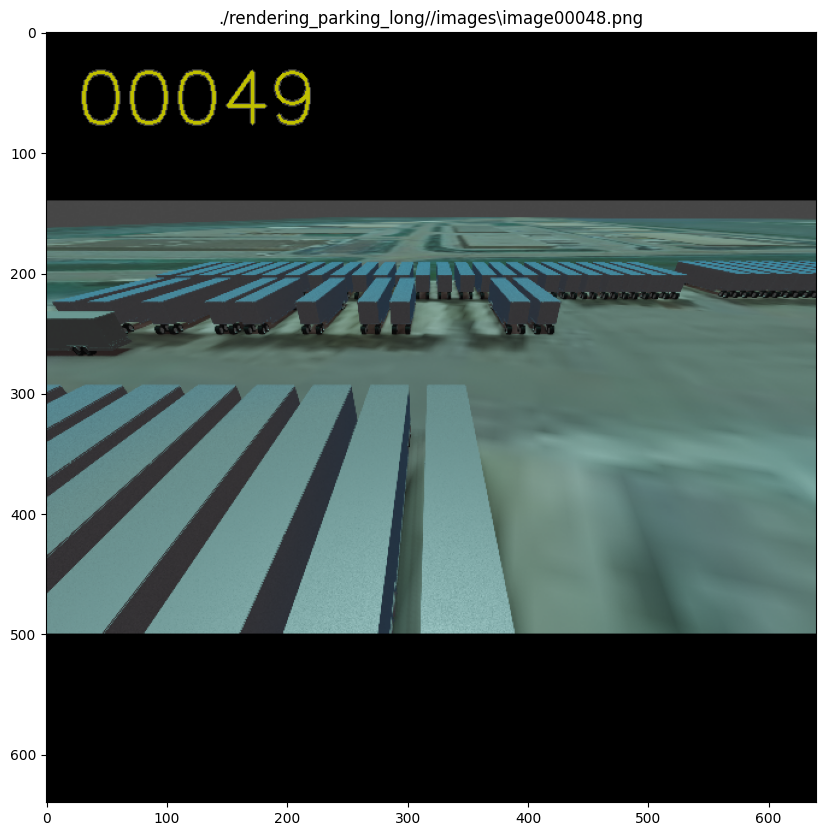

In [12]:
import glob

mura_list = glob.glob(mura_files)
mura_img_vga = []
#dest_h, dest_w = 942, 1254
#dest_h, dest_w = 480, 640
#dest_h, dest_w = HEIGHT, WIDTH    
#fourcc = cv2.VideoWriter_fourcc(*'MP4V')
fourcc = cv2.VideoWriter_fourcc(*'H264')
video_path = HOME_DIR + f'/camera{(cam_id+1):03d}_long.mp4'
out_video = cv2.VideoWriter(video_path, fourcc, dest_fps, (dest_w,dest_h))

cnt = 0
colorz = (192, 192, 0)
color_red = (0, 96, 192)
pos = (25, 75)
sz = 2.0

for k in range(0, cam_offset[cam_id], 6):
    vga_img = np.zeros((dest_h, dest_w, 3), dtype=np.uint8)
    text = '{:05d}'.format(k+1)
    cv2.putText(vga_img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, sz, (64, 64, 64), thickness=3)
    cv2.putText(vga_img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, sz, color_red, thickness=2)
    cnt += 1
    out_video.write(vga_img)    
    

cnt = 0
N_LOOP = 1#int(3000/len(mura_list) + 1)
for x in range(N_LOOP):
    for fpath in mura_list:    
        imgz = cv2.imread(fpath, cv2.IMREAD_COLOR)
        #img_rgbz = cv2.cvtColor(imgz, cv2.COLOR_BGR2RGB)
        #img_rsz = cv2.resize(img_rgbz, (dest_w, dest_h))
        #mura_img_vga.append(img_rsz)
        img_rsz = cv2.resize(imgz, (render_w, render_h),cv2.INTER_AREA)
        img_h, img_w, _ = img_rsz.shape
        starth = (dest_h - img_h)//2
        startw = (dest_w - img_w)//2
        vga_img = np.zeros((dest_h, dest_w, 3), dtype=np.uint8)
        vga_img[starth:starth+img_h, startw:startw +img_w] = img_rsz
        text = '{:05d}'.format(cnt*6+1)
        cv2.putText(vga_img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, sz, (64, 64, 64), thickness=3)
        cv2.putText(vga_img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, sz, colorz, thickness=2)

        out_video.write(vga_img)    
        cnt += 1
        if cnt < 10 + cam_offset[cam_id]:        
            plt.figure(figsize=(20,10))
            plt.title(fpath)
            plt.imshow(vga_img)
        elif cnt % 50 == 0:
            print(fpath)
out_video.release()
#mura_blend_func = albu.TemplateTransform (templates=mura_img_vga, img_weight=0.8, template_weight=0.2, p=1.0)
print(f'done writing {cnt} images to {video_path}!\n---------------------\n')
cvt_path = video_path[:-4] + 'h264.mp4'
!ffmpeg -y -i $video_path -vcodec libx264 -q:v 1 $cvt_path

In [13]:
import glob
cam_offset = [0]*10

mura_files = ANNOT_DIR + 'image*.txt'
mura_list = glob.glob(mura_files)
cnt = 0
json_path = HOME_DIR + f'/camera{(cam_id+1):03d}_longh264.json'
meta_path = HOME_DIR + f'/camera{(cam_id+1):03d}_longh264.meta'
print(json_path)
lenx = len(mura_list)
print(f'total {lenx} frames')

frame_id = 0
check_frames = []
all_classes = set()
with open(json_path, 'w') as json_file:
    json_file.write('[\n')        
    has_prev_frame = False
    new_flg = 'true'
    hand_flg = 'true'
    overlap_flg = 'false'
    #offset added
    for k in range(0, cam_offset[cam_id], 6):
        if has_prev_frame: json_file.write(',\n')
        json_file.write('\t[')
        json_file.write('\n\t]')
        cnt += 1
        has_prev_frame = True


    N_LOOP = 1#int(3000/len(mura_list) + 1)
    for x in range(N_LOOP):
        for fpath in mura_list:    
            with open(fpath, 'r') as f_annot:
                if has_prev_frame: json_file.write(',\n')
                json_file.write('\t[')
                has_before = False
                while True:
                    line = f_annot.readline()
                    if not line:
                        break
                    class_id, cx, cy, ww, hh = map(float, line.split())
                    json_classid = int(class_id + 0.1)                        
                    json_cx = cx*render_w + (dest_w - render_w)*0.5
                    json_cy = cy*render_h + (dest_h - render_h)*0.5
                    json_w = ww*render_w
                    json_h = hh*render_h
                    json_lx = json_cx - json_w*0.5
                    json_ly = json_cy - json_h*0.5
                    # json出力       
                    all_classes.add(class_id)
                    json_prev_end = '\n'
                    if has_before: json_prev_end = ',\n'
                    json_file.write(json_prev_end)
                    json_row = '\t{\n\t\t' + '"class": {},\n\t\t"x": {},\n\t\t"y": {},\n\t\t"w": ' \
                            '{},\n\t\t"h": {},\n\t\t"new": {},\n\t\t"hand": {},' \
                            '\n\t\t"overlap": {}'.format(json_classid, json_lx, json_ly, json_w, json_h, new_flg, hand_flg, overlap_flg) + '\n\t}'
                    json_file.write(json_row)       
                    has_before = True
                json_file.write('\n\t]')
                has_prev_frame = True
                json_file.flush()
                frame_id += 1
                check_frames.append(frame_id)
    # close json
    json_file.write('\n]\n')

    TOTAL_CLASS_NUM = len(all_classes)
    check_frames = list(range(1, lenx+1))
    with open(meta_path, 'w') as meta_file:
        meta_file.write('{')
        meta_file.write(f'"classes":{TOTAL_CLASS_NUM}, "checkedFrames":{check_frames}')
        meta_file.write('}')


./rendering_parking_long//camera001_longh264.json
total 417 frames
